# NLP Analysis using NLTK


In [1]:
# Step 1: Install packages (run only once)
!pip install nltk matplotlib wordcloud scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ravin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import Libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, gutenberg
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# For ML extension
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from random import shuffle

In [4]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alread

True

# Part 1: Text Analysis on Gutenberg Text

In [5]:
# Load your dataset
text = gutenberg.raw('austen-emma.txt')
print("Sample text preview:\n")
print(text[:500])

Sample text preview:

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [6]:
# Tokenization
words = word_tokenize(text)
sentences = sent_tokenize(text)
print(f"\nTotal words: {len(words)}")
print(f"Total sentences: {len(sentences)}")


Total words: 191855
Total sentences: 7493


In [7]:
# Clean, filter, and lemmatize words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
filtered_words = [
    lemmatizer.lemmatize(w.lower()) 
    for w in words if w.isalpha() and w.lower() not in stop_words
]
print(f"\nFiltered word count: {len(filtered_words)}")
print(f"Sample filtered words: {filtered_words[:20]}")


Filtered word count: 69693
Sample filtered words: ['emma', 'jane', 'austen', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessing', 'existence', 'lived']



Top 10 Most Common Words:
[('emma', 860), ('could', 836), ('would', 818), ('miss', 600), ('must', 566), ('harriet', 500), ('much', 484), ('said', 483), ('thing', 456), ('one', 451)]


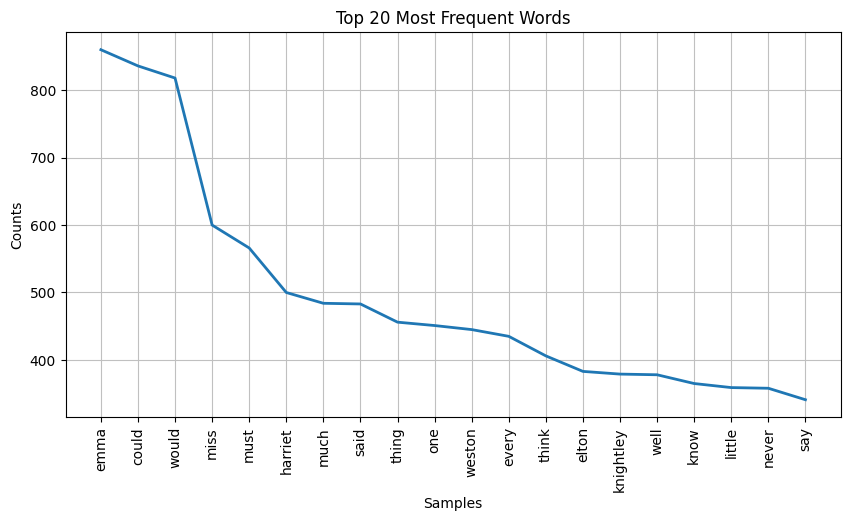

In [8]:
# Frequency Distribution
fdist = FreqDist(filtered_words)
print("\nTop 10 Most Common Words:")
print(fdist.most_common(10))

plt.figure(figsize=(10,5))
fdist.plot(20, cumulative=False)
plt.title("Top 20 Most Frequent Words")
plt.show()

In [9]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
overall_sentiment = sia.polarity_scores(text)
print("\nOverall Sentiment Scores:")
print(overall_sentiment)

# Sentence-level sentiment
print("\nSentence-level Sentiment Examples:")
for sentence in sentences[:5]:
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sia.polarity_scores(sentence)}\n")


Overall Sentiment Scores:
{'neg': 0.081, 'neu': 0.743, 'pos': 0.176, 'compound': 1.0}

Sentence-level Sentiment Examples:
Sentence: [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.
Sentiment: {'neg': 0.051, 'neu': 0.577, 'pos': 0.372, 'compound': 0.9687}

Sentence: She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.
Sentiment: {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.4927}

Sentence: Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection

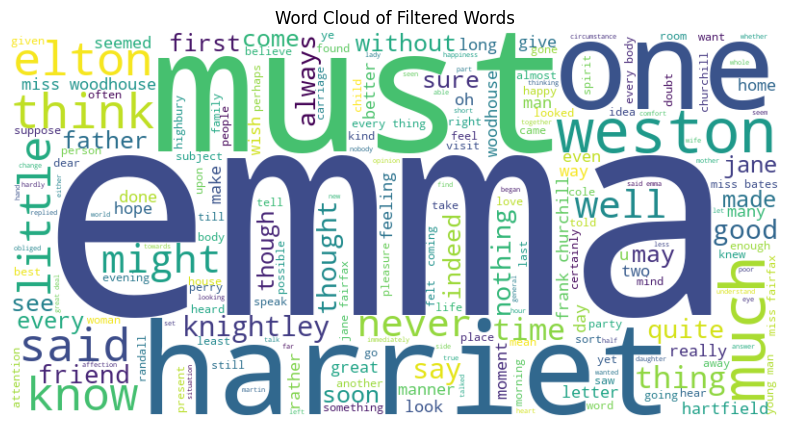

In [10]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Words")
plt.show()

# Part 2: Optional ML Extension (Naive Bayes)

In [11]:
from nltk.corpus import movie_reviews

# Load movie review dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
shuffle(documents)

texts = [" ".join(words) for words, label in documents]
labels = [label for words, label in documents]

In [12]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

In [13]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [14]:
# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate model
y_pred = nb.predict(X_test)
print("ML Extension: Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ML Extension: Naive Bayes Accuracy: 0.7825
              precision    recall  f1-score   support

         neg       0.75      0.84      0.79       197
         pos       0.83      0.72      0.77       203

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



In [15]:
# Predict new text
new_text = "This movie was fantastic! I loved the acting and plot."
new_vec = vectorizer.transform([new_text])
prediction = nb.predict(new_vec)
print("Predicted sentiment for new text:", prediction[0])

Predicted sentiment for new text: pos
